# Aim of this notebook:
1. Work with missing values

2. Create a numeric column to the dataframe about captured carbon

3. Compress projects "Specific Products" under just one column

4. Save the modified dataframe into a CSV file. This CSV file is the "final product" and it can be taken 
into use by anyone who is interested to lear more about past, ongoing and future CCU projects 

5. Give the reader a hint what the CSV files data contains in a form of informative visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("co2_value_europe_database.csv")

Lets do a sanity check and test if values in our dataframe match the values in CO2 Value Europe webpage

In [3]:
# In the dataframe the row number 100 is a project called "Enco2re"

df.loc[99]

# Enco2re is also project number 100 in the CO2 Value Europe webpage
# Great! 

Region                                                                               Europe
Website                                   http://enco2re.climate-kic.org/projects/electr...
Partners                                  Ruhr University Bochum, Covestro, University o...
ProjectDescription                        This project focuses on key fundamental scient...
ProjectLead                                                                       TU Berlin
Country                                                                             Germany
StartTime                                                                        2015-01-09
EndTime                                                                          2017-02-01
Status                                                                            Completed
Budget                                                                                  0.0
FundingSource                             European Institute of Innovation and T

In [4]:
df.columns

Index(['Region', 'Website', 'Partners', 'ProjectDescription', 'ProjectLead',
       'Country', 'StartTime', 'EndTime', 'Status', 'Budget', 'FundingSource',
       'ProjectLength', 'Activities', 'CO2_Source', 'CCU_Tecnology_Category',
       'Facility stage', 'Start_TRL', 'End_TRL', 'Info On Utilization',
       'CO2_Capture_Utilization', 'Production_Volume', 'Product_Categories',
       'Specific_Products_C', 'Specific_Products_A', 'Specific_Products_B',
       'Specific_Products_D', 'Specific_Products_E', 'Specific_Products_F',
       'Specific_Products_G', 'Specific_Products_H', 'Specific_Products_I',
       '\n' Chemicals\n\n\nSpecific Product(s)', 'Specific_Products_K',
       'Specific_Products_L', 'Specific_Products_M', 'Specific_Products_N',
       'Specific_Products_O', 'Specific_Products_P', 'ProjectName'],
      dtype='object')

In [5]:
# Lets change times datatypes in the dataframe df

df['StartTime'] = pd.to_datetime(df['StartTime'], errors='coerce')
df['EndTime'] = pd.to_datetime(df['EndTime'], errors='coerce')

In [6]:
# And lets rename the column names that for some reason was not corrected at the first place

df.rename(columns={'Info On Utilization':'Info_On_Utilization'}, inplace=True)
df.rename(columns={'Facility stage':'FacilityStage'}, inplace=True)

Lets find the columns that has datatype "string" and then fill these columns "NaN" values with "Not Available"

In [7]:
df.dtypes 

Region                                            object
Website                                           object
Partners                                          object
ProjectDescription                                object
ProjectLead                                       object
Country                                           object
StartTime                                 datetime64[ns]
EndTime                                   datetime64[ns]
Status                                            object
Budget                                           float64
FundingSource                                     object
ProjectLength                                    float64
Activities                                        object
CO2_Source                                        object
CCU_Tecnology_Category                            object
FacilityStage                                     object
Start_TRL                                        float64
End_TRL                        

In [8]:
df["Region"].fillna("Not Available", inplace=True)

df["Partners"].fillna("Not Available", inplace=True)

df["Country"].fillna("Not Available", inplace=True)

df["FundingSource"].fillna("Not Available", inplace=True)
df['FundingSource'] = df['FundingSource'].replace('N.A.', 'Not Available') # There was couple "N.A" values that are also changed to "Not Available" to keep data consistent

df["Activities"].fillna("Not Available", inplace=True)

df["CO2_Source"].fillna("Not Available", inplace=True)

df["FacilityStage"].fillna("Not Available", inplace=True)

df["Info_On_Utilization"].fillna("Not Available", inplace=True)

df["CO2_Capture_Utilization"].fillna("Not Available", inplace=True)

df["Production_Volume"].fillna("Not Available", inplace=True)

df["Product_Categories"].fillna("Not Available", inplace=True) # In "Product_Gategories" the scraped data did not come nicely in all of the cases, so extra modification was needed below
df['Product_Categories'] = df['Product_Categories'].replace('Captured CO2Specific Product(s):', 'Captured CO2')
df['Product_Categories'] = df['Product_Categories'].replace('FuelsSpecific Product(s):', 'Fuels')
df['Product_Categories'] = df['Product_Categories'].replace('ChemicalsSpecific Product(s):', 'Chemicals')
df['Product_Categories'] = df['Product_Categories'].replace('Fuels BiomassSpecific Product(s):', 'Fuels, Biomass')
df['Product_Categories'] = df['Product_Categories'].replace('Chemicals (Building) MaterialsSpecific Product(s):', 'Chemicals, (Building) Materials')
df['Product_Categories'] = df['Product_Categories'].replace('N.A.Specific Product(s):', 'Not Available')
df['Product_Categories'] = df['Product_Categories'].replace('Technology infrastucture (Capture Point sources)Specific Product(s):', 'Technology infrastucture (Capture Point sources)')
df['Product_Categories'] = df['Product_Categories'].replace('Technology infrastructure (Utilization) FuelsSpecific Product(s):', 'Technology infrastructure (Utilization), Fuels')
df['Product_Categories'] = df['Product_Categories'].replace('Technology infrastructure (Utilization)Specific Product(s):', 'Technology infrastructure (Utilization)')
df['Product_Categories'] = df['Product_Categories'].replace('Soil/FertilizerSpecific Product(s):', 'Soil/Fertilizer')

Lets see if there is any dublicate rows and remove them if there is 

In [9]:
print("Lenght of the Original DataFrame:")
print(len(df))

# Remove duplicates in the original DataFrame if there is any
df.drop_duplicates(keep='first', inplace=True)
print("\nLenght of the DataFrame after Removing Duplicates:")
print(len(df))

# No dublicates

Lenght of the Original DataFrame:
256

Lenght of the DataFrame after Removing Duplicates:
256


I am not going to fill or replace or drop any "NaN" values from columns that has datatype "float64" or 'datetime64[ns]'. I just want to see how many there is per each column

In [10]:
# We are not deleting or manipulating any rows.

# Sometimes, "NaN" values may carry meaning and should not be treated as missing data. 

float_and_date_columns = df.select_dtypes(include=['float64', 'datetime64[ns]'])
float_and_date_columns_names = float_and_date_columns.columns.tolist()

for column_name in float_and_date_columns_names:
    print(f"Column '{column_name}'\n-has {len(df[pd.notna(df[column_name])])} valid values\n-and {len(df[pd.isna(df[column_name])])} 'NaN' values")
    print()

Column 'StartTime'
-has 240 valid values
-and 16 'NaN' values

Column 'EndTime'
-has 199 valid values
-and 57 'NaN' values

Column 'Budget'
-has 232 valid values
-and 24 'NaN' values

Column 'ProjectLength'
-has 198 valid values
-and 58 'NaN' values

Column 'Start_TRL'
-has 69 valid values
-and 187 'NaN' values

Column 'End_TRL'
-has 214 valid values
-and 42 'NaN' values



## Now lets create a new column to the dataframe that tells us how much carbon each project can capture

1. Challenge: there is a huge variation of units in "CO2_Capture_Utilization".

Here is 3 examples of the values in this column:

"20 million t CO2/y"
"2 t/d capture"
"15 l/min CO2 capture"

2. Question: How to unify CO2 captures? I want the units to be tonnes per year CO2 captured.

- exclude values that can not be converted
- realize that if you manually go row by row and check the values, you see this:

Examples of weight units: "kg", "Mtons", "Mt", "tons", "m3", "tons", "tonnes", "t"

Examples of time units: "yr", "year", "y", "day", "h", "/year", "year.at", "CO2/y", "CO2/year"

Examples of weight/time units: 5) "t/d", "t/y", "kg/h", "Nm3/h", "l/min", "tCO2/a"

It is pretty hard to come up with a converted that could handle such variety of different strings at least
without making tons of errors that would need double chencking and fact checking alot. 

3) Decision: make the conversion manually

How the conversion was done:
- assuming the density of CO2 is about 1.84 kg/m3
- assuming the projects operates 24 hours a day, 365 days a year

In [11]:
# P.S I saved the original colum to the dataframe, so person who wants to check the calculations can do it 

df['Tonnes_Per_Year_Captured'] = df['CO2_Capture_Utilization'] # Create a new column to the dataframe that is identical with the original

# Now we start to manipulate the newly created column

# Filling empty rows and "Not Available" with "NaN"

df['Tonnes_Per_Year_Captured'].fillna(np.nan, inplace=True)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('Not Available', np.nan) 

# Filling manualy "Not Available" to rows where conversion tonnes per year is not possible, not even manually

df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('"several kg CO2 captured/hour"', np.nan) 
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('100 MW electrolysis capacity for H2 (1st phase)', np.nan) 
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('6.7', np.nan) 
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('Easily deployable and scalable', np.nan) 
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('Membrane', np.nan) 
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('Stochiometric', np.nan) 
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('Successive batches in the 5 litres bioreactor', np.nan) 

# Filling manually conversion to tonnes per year carbon captured

df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('2 t/d capture', 730.0) 
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('2,800 tonnes of CO₂ per year', 2800.0) 
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('Cement 1700 Mton/year, Steel 500 Mton/year, Fermentation 18 Mton/year', 1700.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('2,4 Mt CO2 per year.at full capacity', 2.4) 
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('10 Mt/yr of CO2', 10.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('70000 t/a capture capacity', 70000.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('20 million t CO2/y', 20000000.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('almost 700000 tons CO2/year', 700000.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('15 l/min CO2 capture', 7890.0) 

df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('5Nm3/h of CO2', 43.8) 
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('10 t/y CO2 captured', 10.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('100 t/d CO2 captured (1st phase)', 36500.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('100 kg/h capture', 876.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('0.4 Mtons CO2/yr in 2030 and 2.2 Mtons CO2/year from 2034', 0.4) 
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('70000 t/y cO2 captured at 1st phase)', 70000.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('742 t/y CO2', 742.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('90 000 tonnes of CO2/year', 90000.0)

df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('230000 t/y CO2 captured', 230000.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('Up to 40 Nm3/h', 350.4) 
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('4500 t/year', 4500.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('10 t/d CO2 capture capacity', 3650.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('18000 t/y CO2', 18000.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('25Nm3/h', 219.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('Capturing 100.000 t/a CO2', 100000.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('800 tons of CO2 /day', 800.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('100000 t/y biogenic CO2', 100000.0)

df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('12.5Nm3/h of CO2', 109.5) 
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('160000 tons CO2/year', 160000.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('2000 tons CO2/year', 2000.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('65000 tons CO2/year', 65000.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('500 g/h (0.2m2 electrodes)', 4.4)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('up to 0.5 - 10 kg/hr (fuels); 10 m3/h SNG', 'Not Available') # Too broad, taken off
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('280000 t/y of CO2 at full capacity', 280000.0)  
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('5.87 kg/hUnit is designed to yield 10Nm³/h of biomethane', 51.5)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('9100 t/y CO2', 9100.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('10000 t/y CO2', 10000.0)

df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('25 kg/d captured CO2', 9125.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('300 kt/a captured CO2', 300000.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('1-4,25 m3/h', 22.8) # calculated with 2.6 m3 per h
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('15000 tCO2/a captured; 10 MW electrolysis', 15000.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('56000 t/a CO2 utilised', 56000.0)
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('30Nm3/h', 262.8) 
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('1 tons CO2/day', 365.0)  
df['Tonnes_Per_Year_Captured'] = df['Tonnes_Per_Year_Captured'].replace('1 Mt/y captured CO2 at full capacity', 1000000.0)

When scraping the data from the CO2 Europe Value webpage, "Product Information" column created multiple unnecessary columns. These columns values can be compressed under just one column without any information lost. Below, one colum is creted from values of 17 different columns using iterrows() method. 

In [12]:
# Define the columns which values are going the be compressed under just one column
specific_products_columns = df.iloc[:, 22:38]  

# Find rows with only NaN values
nan_value_rows = specific_products_columns[specific_products_columns.isna().all(axis=1)]

# Replace NaN rows with "Not Available" in the first column (any other column would work also, column name does not matter)
for index, row in nan_value_rows.iterrows():
    specific_products_columns.at[index, "Specific_Products_A"] = "Not Available"

specific_products_value_list = [] # New empty list where below code reads the values that are not "NaN"

for index, row in specific_products_columns.iterrows():
    for value in row:
        if not pd.isna(value):
            specific_products_value_list.append(value)
            break

# Lets create a new column to our dataframe: its values are the 'specific_products_value_list' list
df["Specific_Products"] = specific_products_value_list

# Lets fill the "NaN" values with "Not Available"
df["Specific_Products"].fillna("Not Available", inplace=True)

# Lets take the names of columns that we dont need anymore
colums_to_delete = specific_products_columns.columns.to_list()

# And delete those columns and their values from the dataframe
df.drop(columns=colums_to_delete, inplace=True)

Final product: a cleaned CSV file containing CO2 Value Europe's database

In [13]:
print(f"There is {df.shape[1]} columns and {df.shape[0]} rows in the DataFrame 'df'")

There is 25 columns and 256 rows in the DataFrame 'df'


In [14]:
missig_values = df.isnull().sum() / df.shape[0] * 100
print(missig_values)

Region                       0.000000
Website                      0.000000
Partners                     0.000000
ProjectDescription           0.000000
ProjectLead                  0.000000
Country                      0.000000
StartTime                    6.250000
EndTime                     22.265625
Status                       0.000000
Budget                       9.375000
FundingSource                0.000000
ProjectLength               22.656250
Activities                   0.000000
CO2_Source                   0.000000
CCU_Tecnology_Category       0.000000
FacilityStage                0.000000
Start_TRL                   73.046875
End_TRL                     16.406250
Info_On_Utilization          0.000000
CO2_Capture_Utilization      0.000000
Production_Volume            0.000000
Product_Categories           0.000000
ProjectName                  0.000000
Tonnes_Per_Year_Captured    81.250000
Specific_Products            0.000000
dtype: float64


CSV file:

In [15]:
df.to_csv('co2_value_europe_database_cleaned.csv', index=False)

## To get a better idea what information CSV file contains, below is some initial Exploratory Data Analysis 

Function "string_plot" is made for columns that has string as a datatype. 
- it splits the columns values to list
- counts how many times each unique value is occuring in the dataset
- creates a dataframe that can be plotted

In [16]:
def string_plot(column_name):

    lists = df[column_name].str.split(', ')

    uniques = []

    for unique_list in lists:
        unique_values = set(unique_list)
        for value in unique_values:
            uniques.append(value)

    column_df = pd.Series(uniques).value_counts().reset_index()

    column_df.columns = [column_name, 'Count']

    return column_df

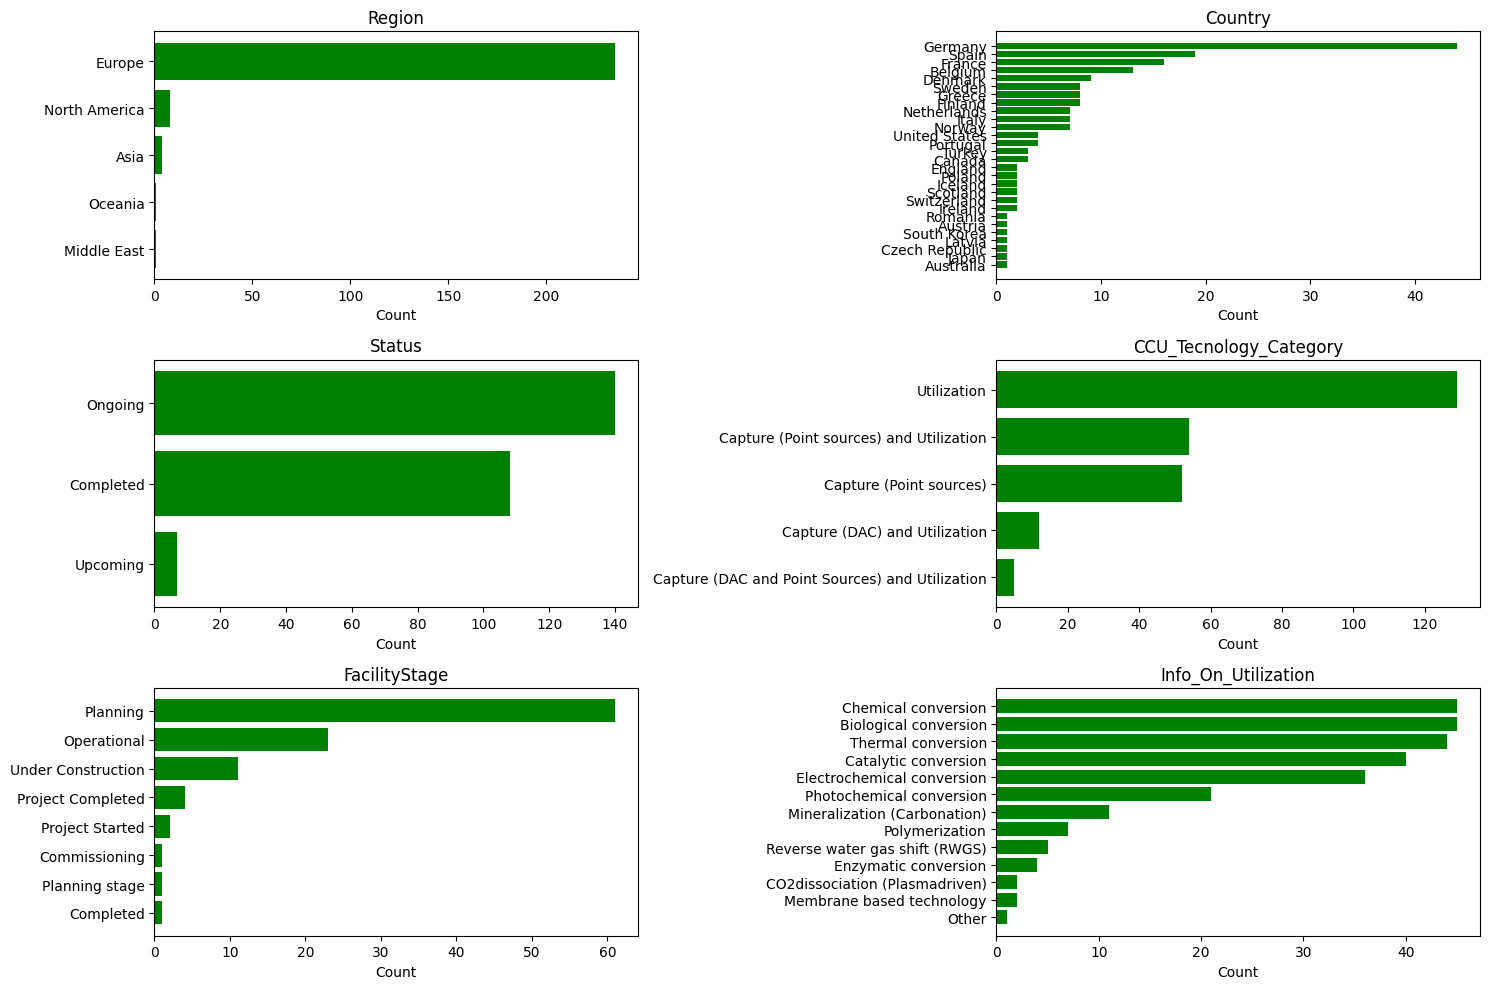

In [17]:
# List of columns that has dtype string and that I want to create bar plots for
columns_to_plot = ['Region', 'Country', 'Status', 'CCU_Tecnology_Category', 'FacilityStage', 'Info_On_Utilization']

# Set the number of rows and columns for subplots
nrows = 3  # Number of rows (3 rows for 6 plots)
ncols = 2  # Number of columns (2 columns for 6 plots)

# Create a figure and subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Function to filter "Not Available" and "N.A." values
def filter_values(column_df):
    return column_df[(column_df[column_name] != 'Not Available') & (column_df[column_name] != 'N.A.')]

for i, column_name in enumerate(columns_to_plot):
    # Calculate row and column indices
    row, col = divmod(i, ncols)
    
    # Get the current axis
    ax = axes[row, col]
    
    # Generate the bar plot for the column using the string_plot function
    column_df = string_plot(column_name)
    
    # Filter values to exclude "Not Available" and "N.A."
    filtered_df = filter_values(column_df)
    
    # Sort the filtered DataFrame by count in ascending order
    sorted_df = filtered_df.sort_values(by='Count', ascending=True)  
    
    # Plot the horizontal bar chart with green bars
    ax.barh(sorted_df[column_name], sorted_df['Count'], color='green')
    ax.set_title(column_name)
    ax.set_xlabel('Count')
    ax.set_ylabel('')  # Fill Y-axis with blank label to save space
    
    # Calculate the x-axis limit with padding
    x_limit = sorted_df['Count'].max() * 1.05  # Padding factor can be adjusted
    # Set the x-axis limit
    ax.set_xlim(0, x_limit)

# Show the plots with tight layout
plt.tight_layout()
plt.show()

Next there is info about projects starting and ending times in the dataset

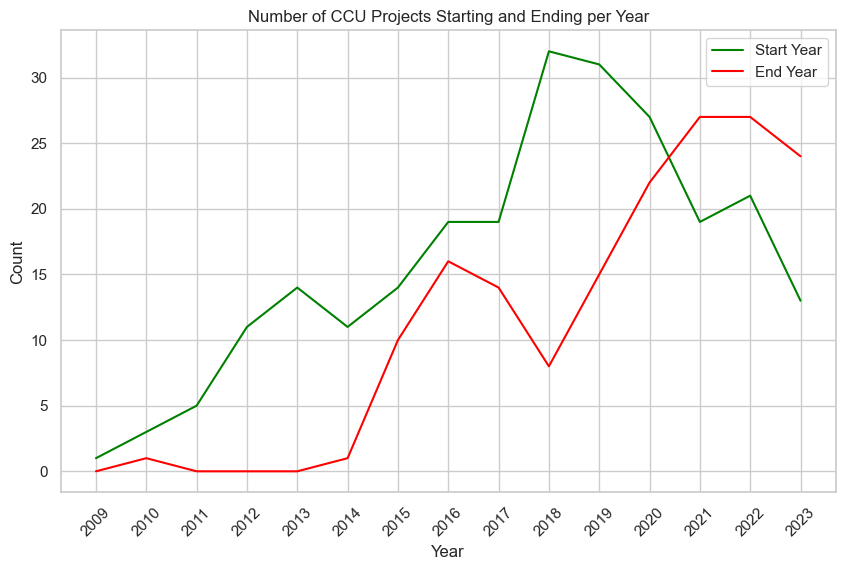

In [18]:
# First I extract the year from the datetime values for both columns "StartTime" and "EndTime"
df['StartYear'] = df['StartTime'].dt.year
df['EndYear'] = df['EndTime'].dt.year

# Count the occurrences of each year for both 'StartTime' and 'EndTime'
start_year_counts = df['StartYear'].value_counts().reset_index()
start_year_counts.columns = ['Year', 'StartCount']

end_year_counts = df['EndYear'].value_counts().reset_index()
end_year_counts.columns = ['Year', 'EndCount']

# Generate a list of all years from 2009 to 2023: the first year value in the dataset is 2009
all_years = list(range(2009, 2024))

# Fill in missing years with a count of 0 for both 'StartTime' and 'EndTime'
start_year_counts = start_year_counts.set_index('Year').reindex(all_years, fill_value=0).reset_index()
end_year_counts = end_year_counts.set_index('Year').reindex(all_years, fill_value=0).reset_index()

# Sort the DataFrames by year
start_year_counts = start_year_counts.sort_values(by='Year')
end_year_counts = end_year_counts.sort_values(by='Year')

# Create a line plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=start_year_counts, x='Year', y='StartCount', color='green', label='Start Year')
sns.lineplot(data=end_year_counts, x='Year', y='EndCount', color='red', label='End Year')

plt.title("Number of CCU Projects Starting and Ending per Year")
plt.xlabel("Year")
plt.ylabel("Count")

plt.xticks(ticks=all_years, rotation=45)  # Set X-axis ticks explicitly
plt.legend()
plt.show()

In [19]:
times = df[["StartTime", "EndTime"]]

times_start = times.sort_values(by="StartTime")
earliest_start_time = times_start.iloc[0]["StartTime"]

most_recent_start_time = times_start["StartTime"].last_valid_index()
most_recent_start_time_value = times_start.at[most_recent_start_time, "StartTime"]

##

times_end = times.sort_values(by="EndTime")
earliest_end_time = times_end.iloc[0]["EndTime"]

most_recent_end_time = times_end["EndTime"].last_valid_index()
most_recent_end_time_value = times_end.at[most_recent_end_time, "EndTime"]

print(f"The first projects starting time in the dataset is {earliest_start_time}.\nThe first projects ending time is {earliest_end_time}.\nThe most recent projects start time is {most_recent_start_time_value}\nand the projection of the last ending time in the dataset is {most_recent_end_time_value}.")

The first projects starting time in the dataset is 2009-01-10 00:00:00.
The first projects ending time is 2010-12-31 00:00:00.
The most recent projects start time is 2023-07-13 00:00:00
and the projection of the last ending time in the dataset is 2030-01-01 00:00:00.


Then there is boxplots for budgets and project lenghts. Both of the plot is made from projects that has given their project budget and length information (in lenght information start time and end time are needed)

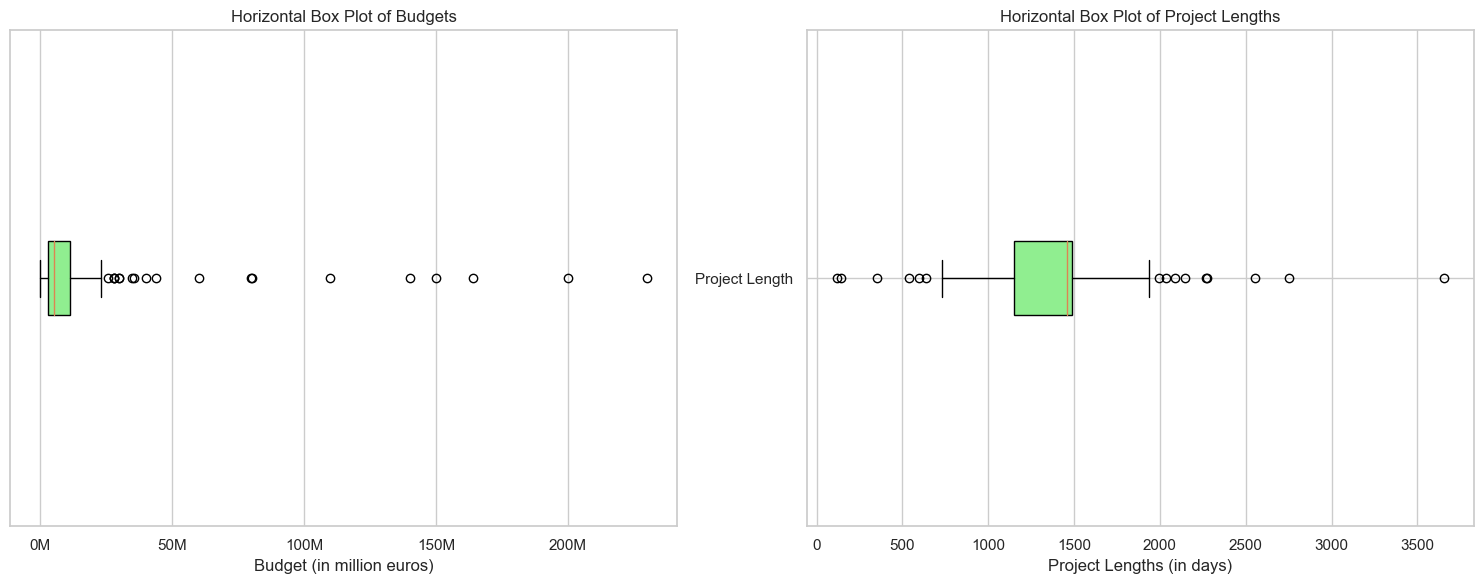

In [20]:
# Filter budgets
valid_budgets = df[pd.notna(df['Budget'])]
budgets_more_than_zero = valid_budgets[valid_budgets["Budget"] > 0.0]
budgets = budgets_more_than_zero["Budget"]

# Filter project lengths
valid_length = df[pd.notna(df['ProjectLength'])]
lenghts_more_than_zero = valid_length[valid_length["ProjectLength"] > 0.0]
lenghts_to_plot = lenghts_more_than_zero["ProjectLength"]

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Create a horizontal box plot for Budgets
boxplot1 = axes[0].boxplot(budgets, vert=False, patch_artist=True, labels=['Budget'], boxprops=dict(facecolor='lightgreen'))
axes[0].set_xlabel("Budget (in million euros)")
axes[0].set_title("Horizontal Box Plot of Budgets")
axes[0].yaxis.set_major_locator(plt.NullLocator())

# Create a horizontal box plot for Project Lengths
boxplot2 = axes[1].boxplot(lenghts_to_plot, vert=False, patch_artist=True, labels=['Project Length'], boxprops=dict(facecolor='lightgreen'))
axes[1].set_xlabel("Project Lengths (in days)")
axes[1].set_title("Horizontal Box Plot of Project Lengths")

# Format X-axis labels to display in millions in Budget plot
def millions(x, pos):
    'The two args are the value and tick position'
    return f'{x / 1e6:.0f}M'

formatter = FuncFormatter(millions)
axes[0].xaxis.set_major_formatter(formatter)

# Adjust layout and show the combined plot
plt.tight_layout()
plt.show()

Next a countplot about CO2 capturing per year (unit: tonnes per year C02 captured). Only 47 projects have given this information

C:\Users\OMISTAJA\AppData\Local\Temp\ipykernel_1392\1834143470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Tonnes_Per_Year_Captured'] = pd.to_numeric(df_filtered['Tonnes_Per_Year_Captured'], errors='coerce')


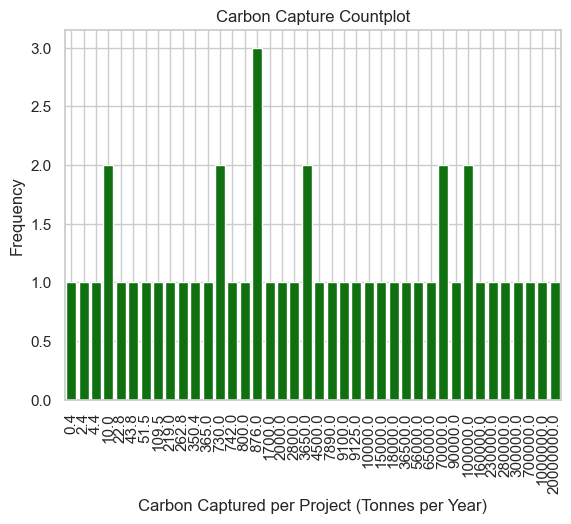

In [21]:
# Filter out the "Not Available" values and convert the column to numeric
df_filtered = df[df['Tonnes_Per_Year_Captured'] != 'Not Available']
df_filtered['Tonnes_Per_Year_Captured'] = pd.to_numeric(df_filtered['Tonnes_Per_Year_Captured'], errors='coerce')

# Sort the DataFrame by the filtered values in ascending order
df_sorted = df_filtered.sort_values(by="Tonnes_Per_Year_Captured")

# Create a countplot with rotated X-axis labels
ax = sns.countplot(data=df_sorted, x="Tonnes_Per_Year_Captured", color="green")
plt.xlabel("Carbon Captured per Project (Tonnes per Year)")
plt.ylabel("Frequency")
plt.title("Carbon Capture Countplot")
plt.grid(True)
# Set Y-axis ticks as integers
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

Next, Technology Readiness Level (TRL) from projects that has given both start TRL and end TRL score

C:\Users\OMISTAJA\AppData\Local\Temp\ipykernel_1392\1384716232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trl_frame["Count"] =  list(range(1, 70))


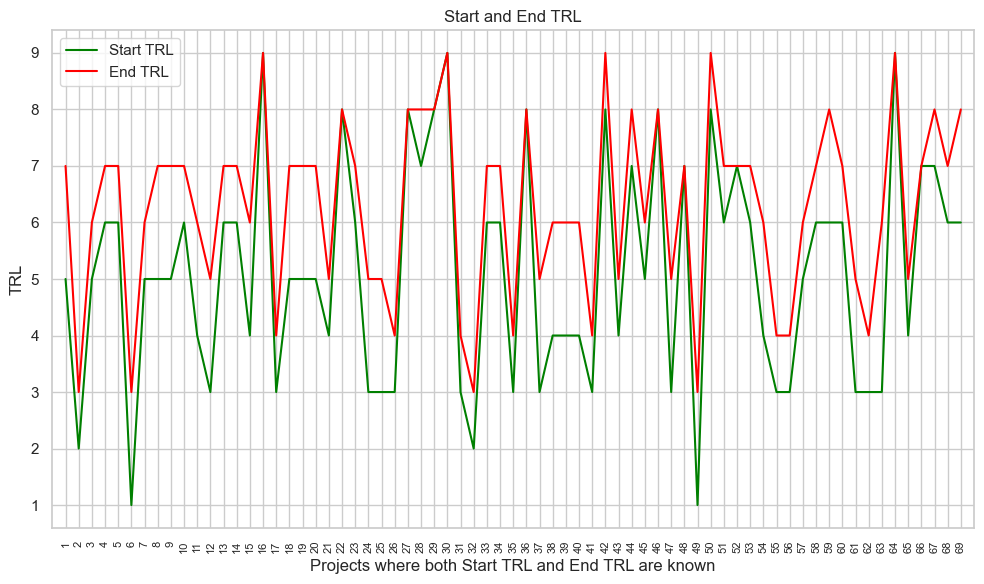

In [22]:
start_and_end_trl_is_valid = df[pd.notna(df['Start_TRL']) & pd.notna(df['End_TRL'])]

trl_frame = start_and_end_trl_is_valid[["Start_TRL","End_TRL"]]

trl_frame["Count"] =  list(range(1, 70))

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=trl_frame, x='Count', y='Start_TRL', color='green', label='Start TRL')
sns.lineplot(data=trl_frame, x='Count', y='End_TRL', color='red', label='End TRL')

plt.title("Start and End TRL")
plt.xlabel("Projects where both Start TRL and End TRL are known")
plt.ylabel("TRL")

# Set X-axis ticks explicitly
plt.xticks(range(1, 70), range(1, 70), rotation=90, fontsize=8)

plt.legend()
plt.tight_layout()  # Ensure everything fits in the plot
plt.xlim(0.0, 70.0)  # Adjust the limits to minimize the gap

plt.show()

As a final plot the rest of the columns that has string as a dtype. I have used the 'string-plot' function here too

In these columns there is a huge variation in different values, so these plots below tell only the TOP10 values per column

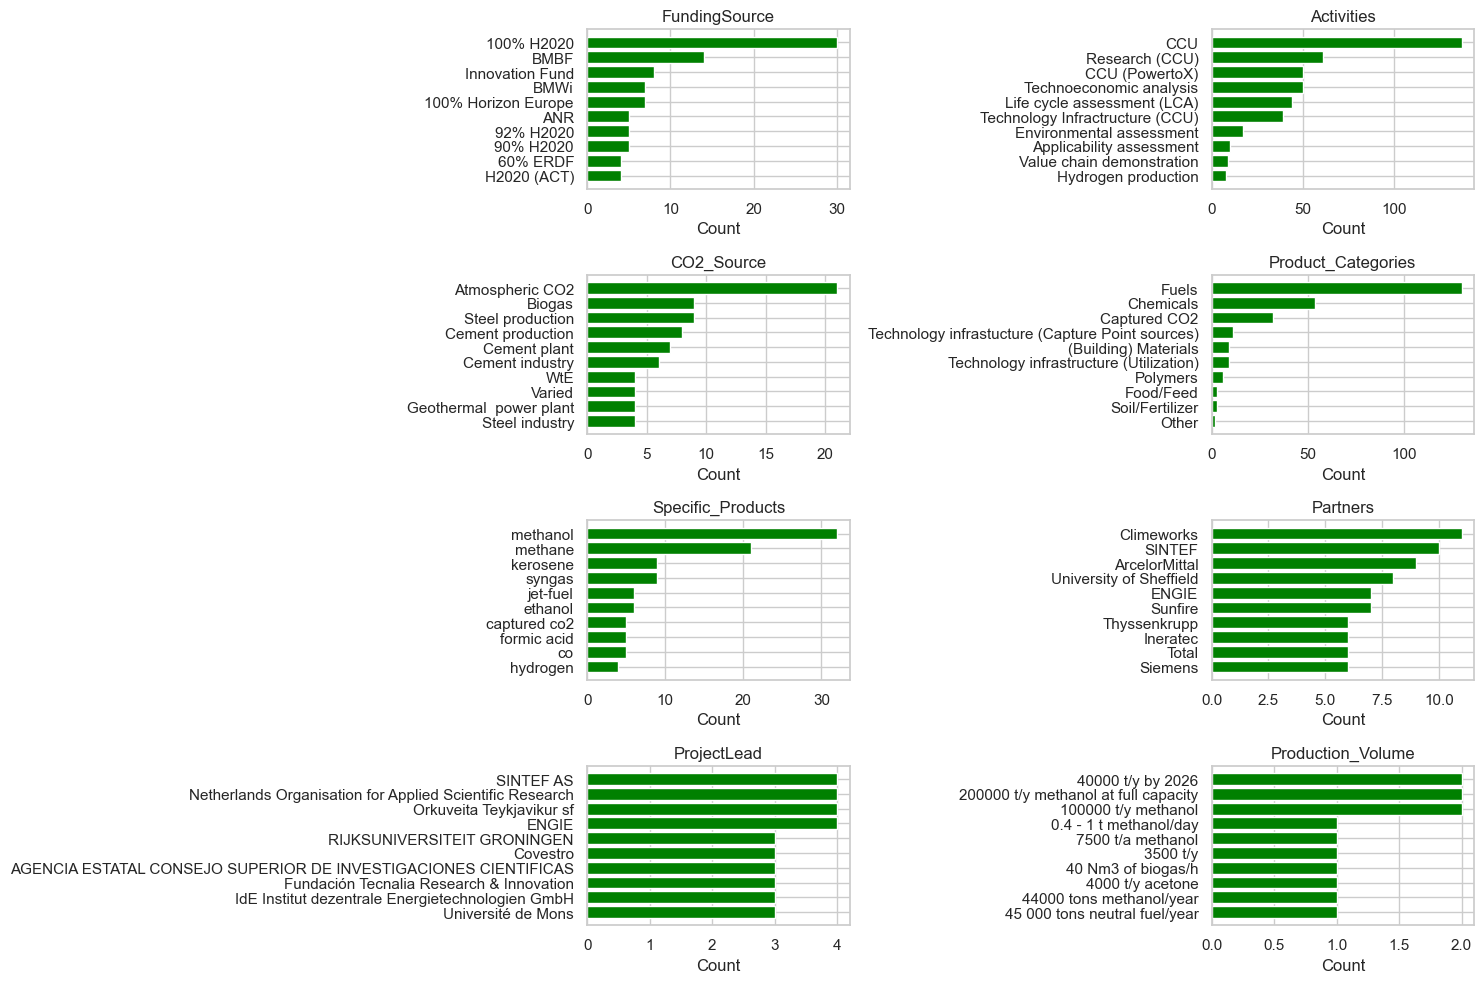

In [24]:
df['Specific_Products'] = df['Specific_Products'].str.lower() # Change all values to lower case in column 'Specific_Products'

# List of columns I want to create bar plots for
columns_to_plot = ['FundingSource', 'Activities', 'CO2_Source', 'Product_Categories', 'Specific_Products', 'Partners','ProjectLead','Production_Volume']

# Set the number of rows and columns for subplots
nrows = 4  # Number of rows (4 rows for 8 plots)
ncols = 2  # Number of columns (2 columns for 6 plots)

# Create a figure and subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Function to filter "Not Available" and "N.A." and "not available" values
def filter_values(column_df):
    return column_df[(column_df[column_name] != 'Not Available') & (column_df[column_name] != 'N.A.') & (column_df[column_name] != 'not available')]

for i, column_name in enumerate(columns_to_plot):
    # Calculate row and column indices
    row, col = divmod(i, ncols)
    
    # Get the current axis
    ax = axes[row, col]
    
    # Generate the bar plot for the column using the string_plot function
    column_df = string_plot(column_name)
    
    # Filter values to exclude "Not Available" and "N.A."
    filtered_df = filter_values(column_df)
    
    # Calculate counts of each unique value
    value_counts = filtered_df.groupby(column_name)['Count'].sum().reset_index()

    # Sort the value_counts DataFrame by count in descending order
    sorted_counts = value_counts.sort_values(by='Count', ascending=False)

    # # # # # Select the top 10 unique values with the highest counts - more than 10 values makes plot messy and hard to read
    top_10_values = sorted_counts.head(10)

    # Reverse the order of the top values to have the highest count at the top
    top_10_values = top_10_values[::-1]
    
    # Plot the horizontal bar chart with green bars
    ax.barh(top_10_values[column_name], top_10_values['Count'], color='green')
    ax.set_title(column_name)
    ax.set_xlabel('Count')
    ax.set_ylabel('')  # Replace Y-axis label with blank to save space
    
    # Calculate the x-axis limit with padding
    x_limit = top_10_values['Count'].max() * 1.05  # Padding factor can be adjusted
    # Set the x-axis limit
    ax.set_xlim(0, x_limit)

# Show the plots
plt.tight_layout()
plt.show()

Lastly, there is WordCloud from all the projects describtions

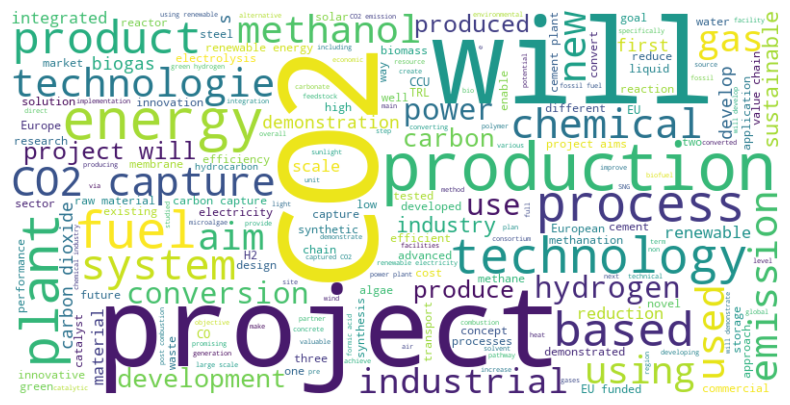

In [25]:
text = " ".join(df["ProjectDescription"].dropna())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Thank you!